# Blending and Pasting Images

În cadrul acestei lecții o să descoperim cum putem să combinăm două imagine, să le amestecăm ca să formeze o singură imagine. De multe ori o să lucrăm cu mai multe imagini, iar OpenCV are mai multe modalități prin care putem să amestecăm imagini sau să le copiem una peste alta. 

Pentru procesul prin care amestecăm două imagini se folosește funcția 'addWeighted()' care utilizează două imagini și le combină. Formula care este aplicată este una destul de simplă și de ușoară

new_pixel = α × pixel_1 + β × pixel_2 + γ

Noul pixel din noua imagine care este creată din două imagini este egal cu o anumită valoare alpha (α) (pe care îl alegem noi), inmulțim această valoare cu primul pixel din prima imagine, după care se adaugă rezultatul de la β × pixel_2 care reprezintăo valoare beta (β) pe care tot noi o alegem plus valoare de la pixelul din a doua imagine. Dacă dorim, la această ecuație putem să îi mai adăugăm un factor gamma (γ). Dacă dorim ca prima imagine să fie mai pronunțată, atunci o să alegem o valoare mai mare pentru alpha (α), iar dacă dorim ca a doua imagine să fie mai pronunțată atunci alegem valoarea mai mare pentru beta (β)

În această parte o să începem partea de blend a imaginilor. Acest concept este destul de ușor atunic când lucrăm cu două imagini care au aceeași dimensiune, dar atunci când imaginile au dimensiuni diferite o să se complice puțin acest concept

In [1]:
# importing the libraries
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

O să lucrăm cu două imagini pe care pentru început o să le deschidem le facem un convert la color channels după care le afișăm

In [5]:
# reading the images
image1 = cv2.imread('../DATA/dog_backpack.png')
image2 = cv2.imread('../DATA/watermark_no_copy.png')

# convert color channel from BGR to RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

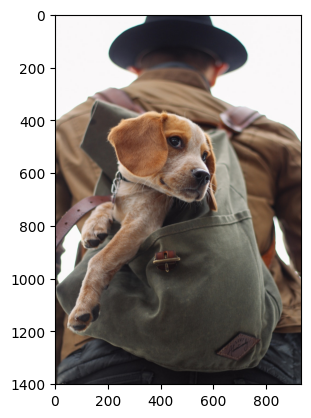

In [6]:
plt.imshow(image1)

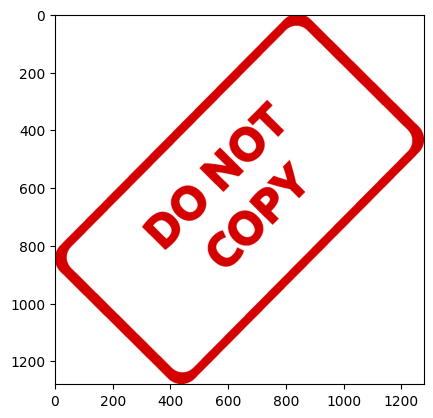

In [7]:
plt.imshow(image2)

Primul lucru pe care îl putem observa la aceste imagini este faptul că acestea nu au aceeași dimensiune. Următorul pas este să le face resize la aceste imagini pentru ca acestea să aibă acceași dimensiune pentru a putea să le facem blend mai ușor. O să le face resize la aceste imagini utilizând metoda 'cv2.resize()'

In [15]:
# resizing the images
resized_image1 = cv2.resize(image1, (900, 1400))
resized_image2 = cv2.resize(image2, (900, 1400))

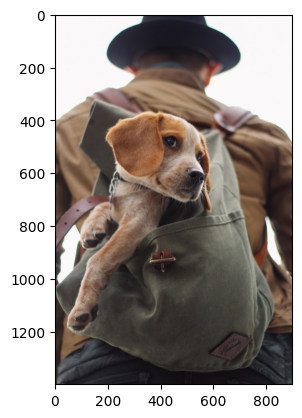

In [16]:
plt.imshow(resized_image1)

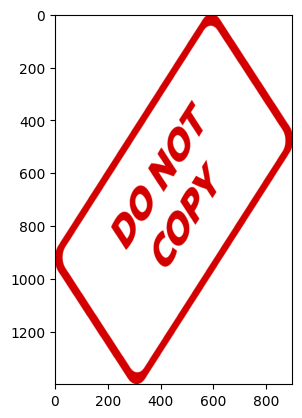

In [17]:
plt.imshow(resized_image2)

După ce am făcut resize la aceste imagini, din moment ce nu au avut același shape, acuma acestea sunt puțins distorsionate (mai ales imaginea 2). Acum că imaginile au aceeași dimesniune, putem să le amestecăm folosind acea metodă denumită 'addWeighted()'. Metoda respectivă returnează ca și output o nouă imagine, imagine pe care trebuie să o salvăm într-o variabilă. Metoda respectivă are nevoie de următoarele argumente:

1. src1 = prima imagine

2. alpha = valoarea pentru parametrul alpha

3. src2 = a doua imagine

4. beta = valoarea pentru parametrul beta

5. gamma = valoarea pentru parametrul gamma

In [18]:
blended_image = cv2.addWeighted(src1=resized_image1, alpha=0.5, src2=resized_image2, beta=0.5, gamma=0)

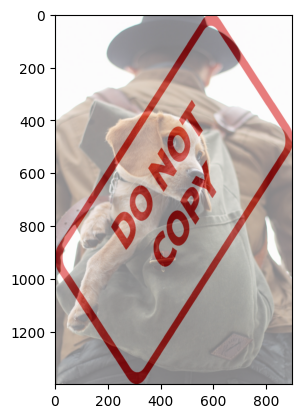

In [19]:
plt.imshow(blended_image)

Alegând valoarea 0.5 pentru parametrii alpha și beta, cele două imagini sunt vizibile la fel de mult. Dacă dorim să avem o imagine mai pronunțată atunci o să fim nevoiți să creștem valoarea parametrului pentru acea imagine. O să creem o imagine în care să avem prima imagine mai pronunătă decât a doua (pentru asta o să creștem valoarea pentru parametrul alpha)

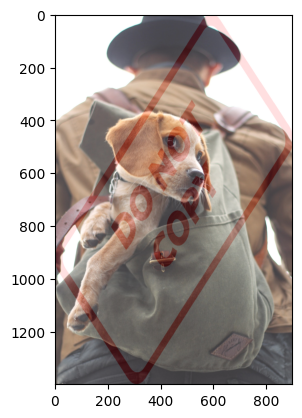

In [30]:
blended_image = cv2.addWeighted(src1=resized_image1, alpha=0.9, src2=resized_image2, beta=0.2, gamma=0)
plt.imshow(blended_image)

Acesta este modul prin care putem să amestecăm două imagini de aceeași dimensiune. Putem să experimentăm cu valorile pentru acestă metodă dacă dorim să avem rezultat, dacă dorim ca o anumită imagine să fie mai pronunțată sau nu. Acuma o să vedem cum putem să suprapunem imagini de dimensiuni diferite. Am modificat ca cele două imagini să aibă aceleași dimensiuni, dar dacă dorim să facem acest procedeu cu două imagini care au dimensiuni diferite, atunic o să primim o eroare.

În continuare o să ne uităm peste modalitatea prin care putem să suprapunem o imagine mai mică peste o imagine mai mare (fără partea de blending, de amestecare de imagini). Practic acest procedeu se face printr-o operație de reasignare folosind numpy. Ceea ce o să facem, o să luăm valorile imaginii mai mari și o să le reasignăm cu valorile imaginii mai mici. O să lucrăm din nou cu aceste două imagini, dar de data asta o să facem imaginea doi să aibă o dimensiune mai mică (de 600x600).

(1401, 934, 3)

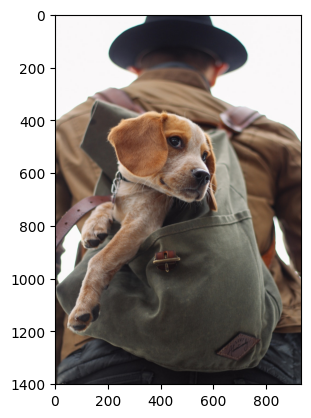

In [34]:
plt.imshow(image1)
image1.shape

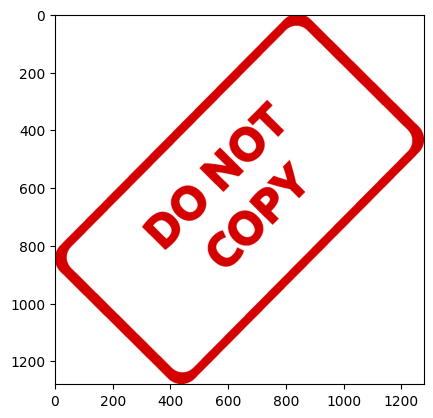

In [32]:
plt.imshow(image2)

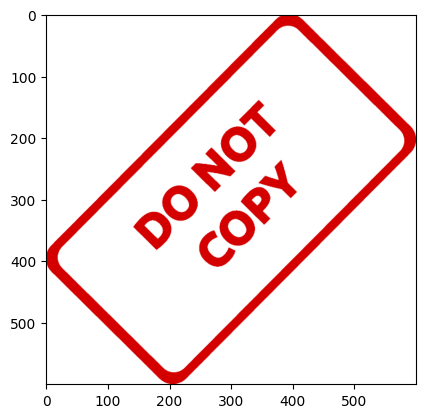

In [33]:
resized_image2 = cv2.resize(image2, (600, 600))
plt.imshow(resized_image2)

Din dimensiunile imaginilor se poate observa faptul că imaginile pe care dorim să le combinăm au acuma dimensiuni diferite. Imaginea 1 (image1) are dimensiunea de 1401x934, iar imaginea doi (resized_image2) are dimensiunea de 600x600. Asta înseamnă că imaginea doi încape în cadrul imaginii 1. Este mult mai util dacă denumim aceste imagini large_image și small_image pentru a le putea referenția mai ușor

In [35]:
large_image = image1
small_image = resized_image2

Ce trebuie să ne dăm seama este modul prin care putem să luăm o bucată din imaginea mare (o bucată de 600x600) și să înlocuim valorile acelei bucăți cu noua imagine. Dacă ne amintim din Secțiunea de Numpy, acest lucru se poate face utilizând slicing. Pentru început o să ne creem două variabile, iar acestea o să conțină valoarea pixelilor de unde dorim să începem să modificăm valorile cu noua imagine (pixelii reprezintă colțul stânga-sus al imaginii).

In [37]:
x_offset = 0
y_offset = 0

Următorul pas pe care trebuie să îl facem este să ne mai creem două variabile, variabile care o să reprezinte valoarea pixelilor unde o să se termine imaginea respectivă. Aceste valori o să fie egale cu valoarea de început a imaginii plus dimensiunea imaginii mici. Dimensiunile imaginii le preluăm din atributul shape, de unde extragem valorile care ne interesează. Valoarea pentru x este sitaută la index-ul cu poziția 1, iar valoarea pentru y, la 0

In [38]:
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]

Acum avem coordonatele de început și de sfârșit a imaginii mici pe care dorim să o suprapunem peste imaginea mare. În continuare o să extragem utilizând slicing acea porțiune din imaginea mare unde dorim să afișăm imaginea mică

In [39]:
large_image[y_offset:y_end, x_offset:x_end]

array([[[250, 248, 249],
        [250, 248, 249],
        [250, 248, 249],
        ...,
        [249, 247, 248],
        [249, 247, 248],
        [249, 247, 248]],

       [[250, 248, 249],
        [250, 248, 249],
        [250, 248, 249],
        ...,
        [249, 247, 248],
        [249, 247, 248],
        [249, 247, 248]],

       [[250, 248, 249],
        [250, 248, 249],
        [250, 248, 249],
        ...,
        [249, 247, 248],
        [249, 247, 248],
        [249, 247, 248]],

       ...,

       [[122,  91,  73],
        [122,  91,  73],
        [122,  91,  73],
        ...,
        [ 99,  49,  26],
        [104,  52,  30],
        [109,  58,  31]],

       [[121,  89,  74],
        [120,  88,  73],
        [119,  87,  72],
        ...,
        [103,  51,  29],
        [106,  54,  32],
        [111,  60,  33]],

       [[121,  89,  74],
        [119,  87,  72],
        [117,  85,  70],
        ...,
        [105,  53,  31],
        [109,  57,  33],
        [113,  62,  35]]

Prin codul de mai sus am extras acea porțiune de 600x600 din imaginea mare peste care dorim să suprapunem imaginea mai mică. Pentru a putea înțelege și mai bine ce anume am extras, putem să afișăm acea porțiune din imagine creată prin slicing

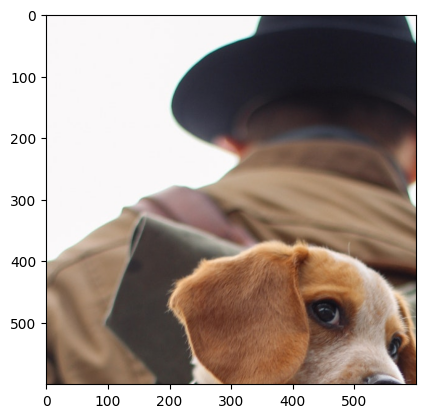

In [40]:
plt.imshow(large_image[y_offset:y_end, x_offset:x_end])

După cum se poate observa, imaginea care este afișată după ce am utilizat slicing este o porțiune de 600x600 din imaginea mare. Acestei porțiuni o să îi atribuim noua imagine ca și valoare

In [41]:
large_image[y_offset:y_end, x_offset:x_end] = small_image

După ce i-am atribuit noua valoare acelei porțiuni acuma putem să afișăm imaginea pentru a vedea cum arată

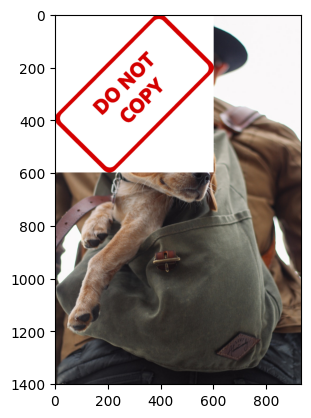

In [42]:
plt.imshow(large_image)

Se poate vedea că imaginea mică a fost suprapusă peste imaginea mare, iar această suprapunere a fost realizată utilizând procedeul de reasignare din NumPy fără partea de blending între imagini.

## Recapitulare

În cadrul acestei lecții am învățat următoarele:

    1. Pentru a putea face blending la două imagini, este recomandat ca acestea să aibă acceași dimensiune

        image1 = cv2.imread(path_to_image_1)
        
        image2 = cv2.imread(path_to_image_2)

        image1 = cv2.resize(image1, (900, 1400))

        image2 - cv2.resize(image2, (900, 1400))

    2. Pentru a face blending la două imagini ne folosim de metoda 'cv2.addWeighted()'

        blended_image = cv2.addWeighted(src1=image1, alpha=0,5, src2=image2, beta=0.5, gamma=0)
    
    3. Putem să suprapunem două imagini fără să facem blending între ele. O să suprapunem imaginea mare pe imaginea mică

        3.1 Trebuie să ne asigurăm că o imagin este mai mică decât cealaltă

            large_image = cv2.resize(image1, (1000, 1500))

            small_image = cv2.resize(image2, (500, 500))
        
        3.2 O să ne creem două variabile care o să rețintă unde o să fie amplasată în imaginea mare colțul imaginii mici 

            x_offset = 0

            y_offset = 0

                # Colțul imaginii stânga-sus mai mici o să fie identic cu colțul imaginii stânga-sus mai mare

        3.3 O să ne creem două variabile care o să rețină unde o să fie amplasat colțul dreapta-jos al imaginii mici în imginea mare. O să fie egal cu colțul stânga-sus plus inălțimea și lățimea imaginii mici

            x_end = small_image.shape[1]

            y_end = small_image.shape[0]

        3.4 O să utilizăm slicing pentru a extrage porțiunea din imaginea mare unde o să fie amplasată imaginea mai mică

            large_image[y_offset:y_end, x_offset:x_end]

        3.5 Acestei porțiuni pe care am extras-o putem să îi atribuim ca și valoare acea imagine mică

            large_image[y_offset:y_end, x_offset:x_end] = small_image